In [3]:
import torch
import torch.nn.functional as F

words = open('../names-subset.txt', 'r').read().splitlines()

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [ ]:
#manual
labels = ['.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
chars = sorted(list(set(''.join(labels))))


stoi = {s:i for i,s in enumerate(chars)}
#stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}



In [224]:
xs, ys = [], []
# for w in words[:1][0:1]:
for w in words:
  print(w)
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

print(xs)
print(ys)

emma
tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


In [235]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [ ]:
!pip install seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the heatmap for the weight matrix
plt.figure(figsize=(15, 12))
sns.heatmap(W.data, cmap='viridis', annot=True, fmt=".2f")
plt.title('Heatmap of the Weights')
plt.xlabel('Output Neurons')
plt.ylabel('Input Neurons')
plt.show()


In [ ]:

for i in range(100):
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    
    logits = xenc @ W
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character

    loss = -probs[torch.arange(num), ys].log().mean() + 0.05*(W**2).mean()

    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()

    # update
    W.data += -1 * W.grad

print(loss)

In [ ]:
# Define the labels
labels = ['.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

# Plotting the heatmap for the weight matrix
plt.figure(figsize=(15, 12))
sns.heatmap(W.data, cmap='viridis', annot=True, fmt=".2f", xticklabels=labels, yticklabels=labels)
plt.title('Heatmap of the Weights')
plt.xlabel('Output Neurons')
plt.ylabel('Input Neurons')

# Move x-axis labels to the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

plt.show()

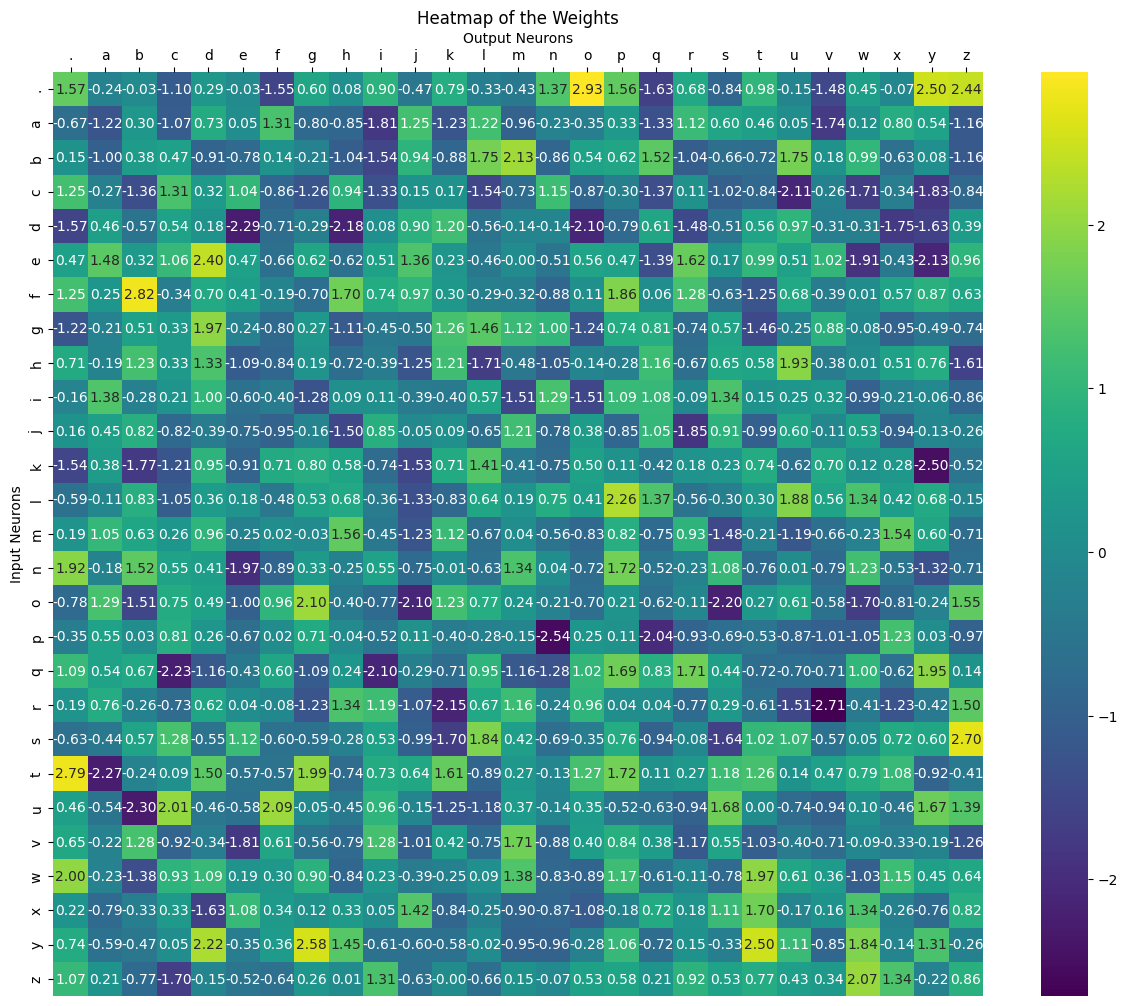

In [268]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

# Define the labels
labels = ['.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

# Plotting the heatmap for the weight matrix
plt.figure(figsize=(15, 12))
sns.heatmap(W.data, cmap='viridis', annot=True, fmt=".2f", xticklabels=labels, yticklabels=labels)
plt.title('Heatmap of the Weights')
plt.xlabel('Output Neurons')
plt.ylabel('Input Neurons')

# Move x-axis labels to the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

plt.show()

In [8]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((5, 5), generator=g, requires_grad=True)
print(W)

tensor([[ 1.5674, -0.2373, -0.0274, -1.1008,  0.2859],
        [-0.0296, -1.5471,  0.6049,  0.0791, -0.7814],
        [-0.2808, -0.7389,  1.7249,  0.0380, -1.0694],
        [-0.5374,  0.0511, -0.4755,  0.6205,  1.1500],
        [-0.9643, -0.8815, -0.8295, -0.2548, -0.9648]], requires_grad=True)


In [286]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [287]:
import torch.nn.functional as F
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've defined `xs`, `ys`, `num`, and `W` elsewhere in your code

# List to store weights at each iteration
weight_snapshots = []

for i in range(2):
    formatted_data = ', '.join([f"{value:.2f}" for value in W.data[0].tolist()])
    #print(formatted_data)
    xenc = F.one_hot(xs[0:1], num_classes=27).float() # input to the network: one-hot encoding
    
    logits = xenc @ W
    print(', '.join([f"{value:.2f}" for value in logits[0].tolist()]))
    counts = logits.exp() # counts, equivalent to N
    print(', '.join([f"{value:.2f}" for value in counts[0].tolist()]))

    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    print(', '.join([f"{value:.2f}" for value in probs[0].tolist()]))
    loss = -probs[torch.arange(num), ys].log().mean() 
    #+ 0.05*(W**2).mean()
    #loss = -probs[[0], [5]].log().mean() 
    #+ 0.05*(W**2).mean()
    print(probs[[0], [5]])
    print(probs[[0], [5]].log())


    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()

    # update
    W.data += -50 * W.grad
    
    # Append weight matrix to the list
    weight_snapshots.append(W.grad.data.log().clone())
    #print(W.grad.data[0,5],W.grad.data[5,13], W.grad.data[13,13],W.grad.data[13,1],W.grad.data[1,0], W.grad.data[0,26])
    #print(W.data[0,5],W.data[5,13], W.data[13,13],W.data[13,1],W.data[1,0], W.data[0,26])
  
   

formatted_data = ', '.join([f"{value:.2f}" for value in W.data[0].tolist()])
#print(formatted_data)

1.57, -0.24, -0.03, -1.10, 0.29, -0.03, -1.55, 0.60, 0.08, 0.90, -0.47, 0.79, -0.33, -0.43, 1.37, 2.93, 1.56, -1.63, 0.68, -0.84, 0.98, -0.15, -1.48, 0.45, -0.07, 2.50, 2.44
4.79, 0.79, 0.97, 0.33, 1.33, 0.97, 0.21, 1.83, 1.08, 2.47, 0.62, 2.20, 0.72, 0.65, 3.95, 18.79, 4.77, 0.20, 1.97, 0.43, 2.68, 0.86, 0.23, 1.57, 0.93, 12.14, 11.53
0.06, 0.01, 0.01, 0.00, 0.02, 0.01, 0.00, 0.02, 0.01, 0.03, 0.01, 0.03, 0.01, 0.01, 0.05, 0.24, 0.06, 0.00, 0.02, 0.01, 0.03, 0.01, 0.00, 0.02, 0.01, 0.15, 0.15
tensor([0.0123], grad_fn=<IndexBackward0>)
tensor([-4.3993], grad_fn=<LogBackward0>)
-1.47, -0.74, -0.64, -1.31, -0.56, 49.36, -1.68, -0.55, -0.61, -0.66, -0.87, -0.60, -0.78, -0.84, -1.12, -8.96, -1.45, -1.75, -0.57, -1.11, -0.71, -0.69, -1.62, -0.54, -0.66, -5.19, -4.85
0.23, 0.48, 0.53, 0.27, 0.57, 2723064359992644599808.00, 0.19, 0.57, 0.55, 0.52, 0.42, 0.55, 0.46, 0.43, 0.32, 0.00, 0.23, 0.17, 0.57, 0.33, 0.49, 0.50, 0.20, 0.58, 0.52, 0.01, 0.01
0.00, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00

In [34]:
#g = torch.Generator().manual_seed(2147483647)
#W = torch.randn((5, 5), generator=g, requires_grad=True)
W = torch.randn((5, 5), requires_grad=True)
print(W)

tensor([[ 0.6370, -0.9291,  0.2600, -1.6161,  2.2811],
        [-0.1446,  1.9798,  0.7523,  1.0044, -0.2436],
        [-0.7211, -0.7822, -0.4299,  0.2076, -0.7612],
        [ 2.4256, -0.9387,  2.1130, -0.7774, -1.4712],
        [-0.4676, -1.0907,  1.0662,  1.1572,  1.1167]], requires_grad=True)


In [29]:
 
#xenc = [0,0,1,0,0] 
xenc = F.one_hot(torch.tensor([2]), num_classes=5).float()
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
print(probs[[0], [2]])
loss = -probs[[0], [2]].log().mean() 
W.grad = None # set to zero the gradient
loss.backward()
W.data += -50 * W.grad

tensor([[0., 0., 1., 0., 0.]])
tensor([[ -6.6711, -10.2552,  46.9663, -17.1030, -10.3032]],
       grad_fn=<MmBackward0>)
tensor([[1.2670e-03, 3.5175e-05, 2.4959e+20, 3.7347e-08, 3.3526e-05]],
       grad_fn=<ExpBackward0>)
tensor([[5.0762e-24, 1.4093e-25, 1.0000e+00, 1.4963e-28, 1.3433e-25]],
       grad_fn=<DivBackward0>)


In [30]:
#loss = -probs[0,2].log().mean() + 0.05*(W**2).mean()
print(probs[[0], [2]])
loss = -probs[[0], [2]].log().mean() 

print(loss)


# backward pass
W.grad = None # set to zero the gradient
loss.backward()

# update
W.data += -50 * W.grad

tensor([1.], grad_fn=<IndexBackward0>)
tensor(-0., grad_fn=<NegBackward0>)


In [31]:
formatted_W = "\n".join([", ".join([f"{value:.2f}" for value in row]) for row in W.grad.tolist()])
print(formatted_W)

0.00, 0.00, 0.00, 0.00, 0.00
0.00, 0.00, 0.00, 0.00, 0.00
0.00, 0.00, 0.00, 0.00, 0.00
0.00, 0.00, 0.00, 0.00, 0.00
0.00, 0.00, 0.00, 0.00, 0.00


In [33]:
formatted_W = "\n".join([", ".join([f"{value:.2f}" for value in row]) for row in W.tolist()])
print(formatted_W)

0.02, 0.35, -1.76, -0.24, -0.32
0.93, 0.25, -0.90, 0.45, 0.79
-6.67, -10.26, 46.97, -17.10, -10.30
0.51, -0.87, 0.93, 0.20, -0.93
0.64, -0.34, 0.93, 1.15, -0.81
